# AOU University

# WeCare: Graduation project

# Name: Mohamed Tarek Mohamed Elsaid

# ID: 2051711398

# Diabetes Notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
import pickle
%matplotlib inline
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("diabetes_prediction_dataset.csv")  
data.head()  

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Investigate data

In [3]:
data.shape

(100000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


# Dealing with categorical data

In [6]:
data['smoking_history'] = data['smoking_history'].map({'never':0,'current':1,
                                                      'former':2,'ever':3,'not current':4})
data['gender'] = data['gender'].map({'Female':1,'Male':0})

In [7]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,54.0,0,0,NaN,27.32,6.6,80,0
2,0.0,28.0,0,0,0.0,27.32,5.7,158,0
3,1.0,36.0,0,0,1.0,23.45,5.0,155,0
4,0.0,76.0,1,1,1.0,20.14,4.8,155,0


In [8]:
data.isnull().sum()

gender                    18
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

# Dealing with missing values

In [9]:
data['smoking_history'] = data['smoking_history'].fillna(1)

In [10]:
data['gender']=data['gender'].fillna(data['gender'].median())

In [11]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

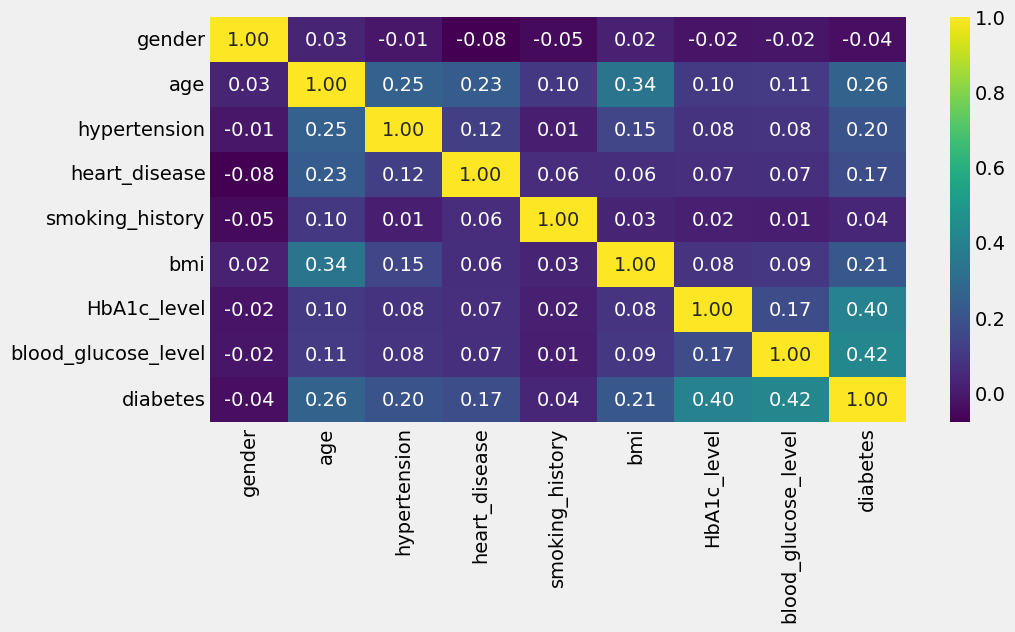

In [12]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [13]:
print(f'Good People : {data.diabetes.value_counts()[0]}')
print(f'Infected People : {data.diabetes.value_counts()[1]}')

Good People : 91500
Infected People : 8500


In [14]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 0.08 max = 80.0 mean = 41.885856


In [15]:
#Prepare ages for a bie chart
Young = data[(data.age>=1)&(data.age<30)]
Middle = data[(data.age>=30)&(data.age<42)]
Old = data[(data.age>42)]

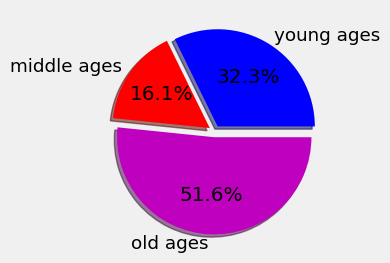

In [16]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.06,0.06,0.06]
plt.figure(figsize=(5,3))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

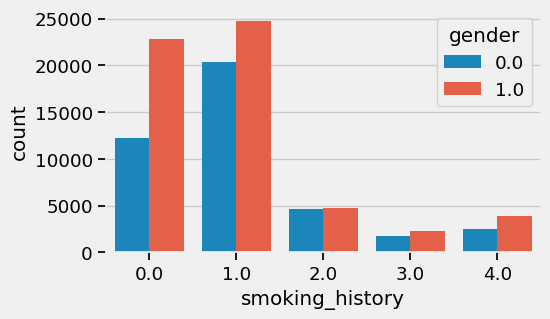

In [17]:
#Sex 
plt.figure(figsize=(5,3))
sns.countplot(x='smoking_history', data=data, hue='gender')
plt.show()

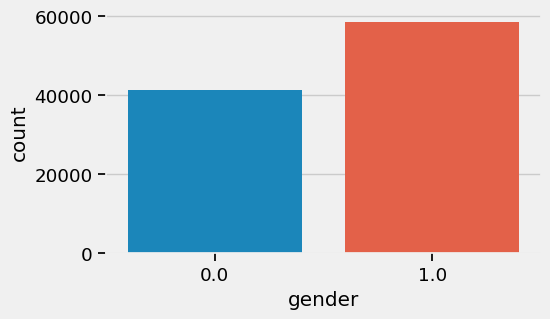

In [18]:
#Gender 
plt.figure(figsize=(5,3))
sns.countplot(x='gender', data=data)
plt.show()

In [19]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0.0,25.19,6.6,140,0
1,1.0,54.0,0,0,1.0,27.32,6.6,80,0
2,0.0,28.0,0,0,0.0,27.32,5.7,158,0
3,1.0,36.0,0,0,1.0,23.45,5.0,155,0
4,0.0,76.0,1,1,1.0,20.14,4.8,155,0


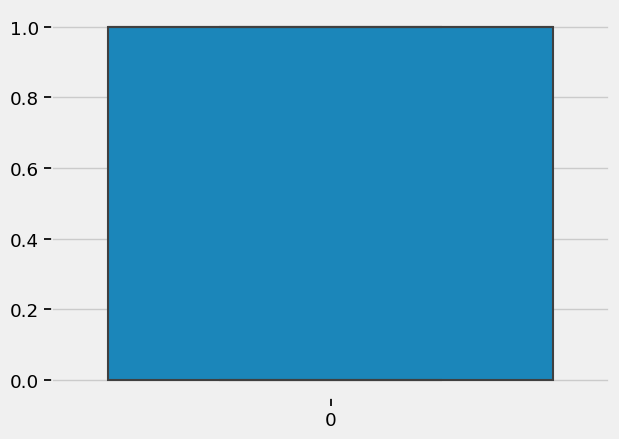

In [20]:
#outliers
sns.boxplot(data['gender'])
plt.show()

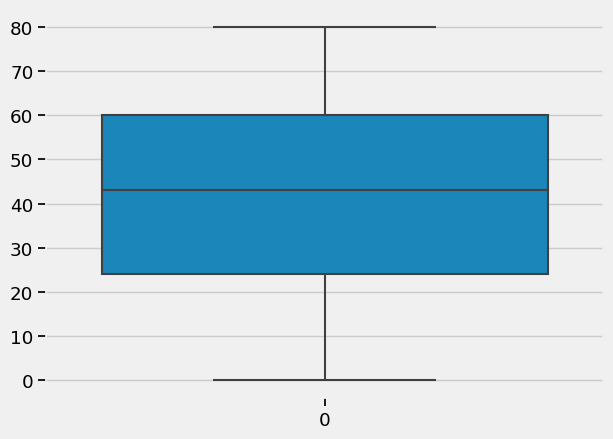

In [21]:
#outliers
sns.boxplot(data['age'])
plt.show()

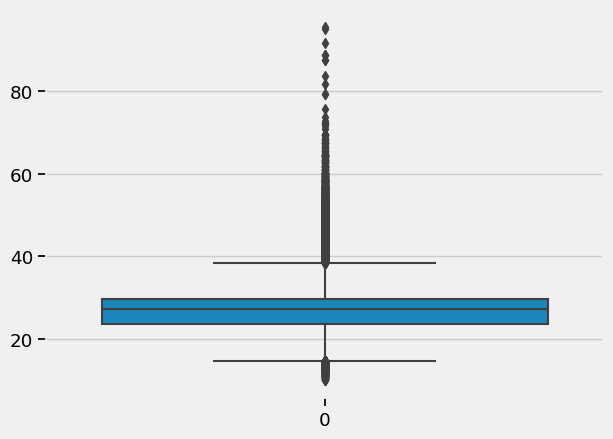

In [22]:
#outliers
sns.boxplot(data['bmi'])
plt.show()

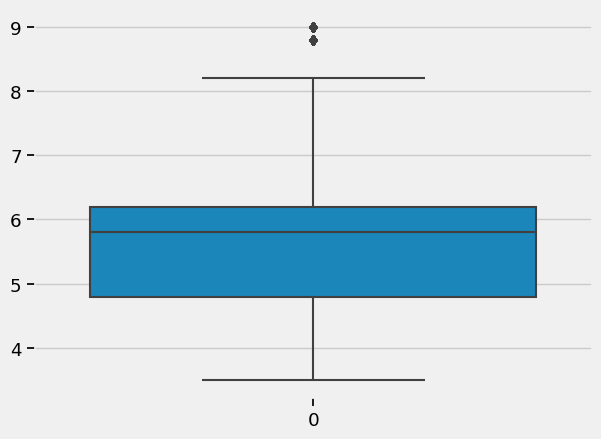

In [23]:
#outliers
sns.boxplot(data['HbA1c_level'])
plt.show()

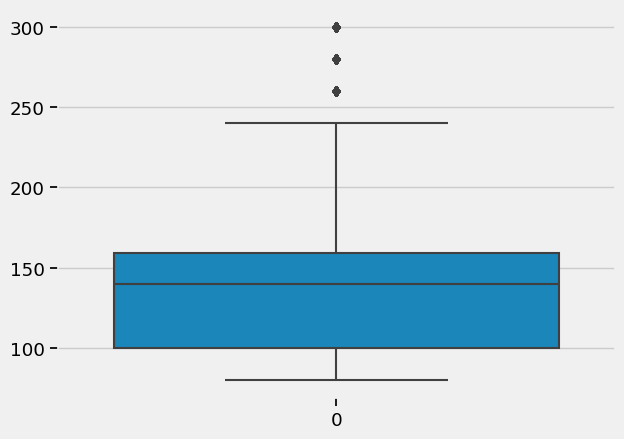

In [24]:
#outliers
sns.boxplot(data['blood_glucose_level'])
plt.show()

# Dealing with outliers

In [25]:
outlier_indices = np.where( (data['bmi'] >= 38) | (data['bmi'] <= 15 ))
data = data.drop(outlier_indices[0])

In [26]:
data.shape

(91972, 9)

# Fearture Selection

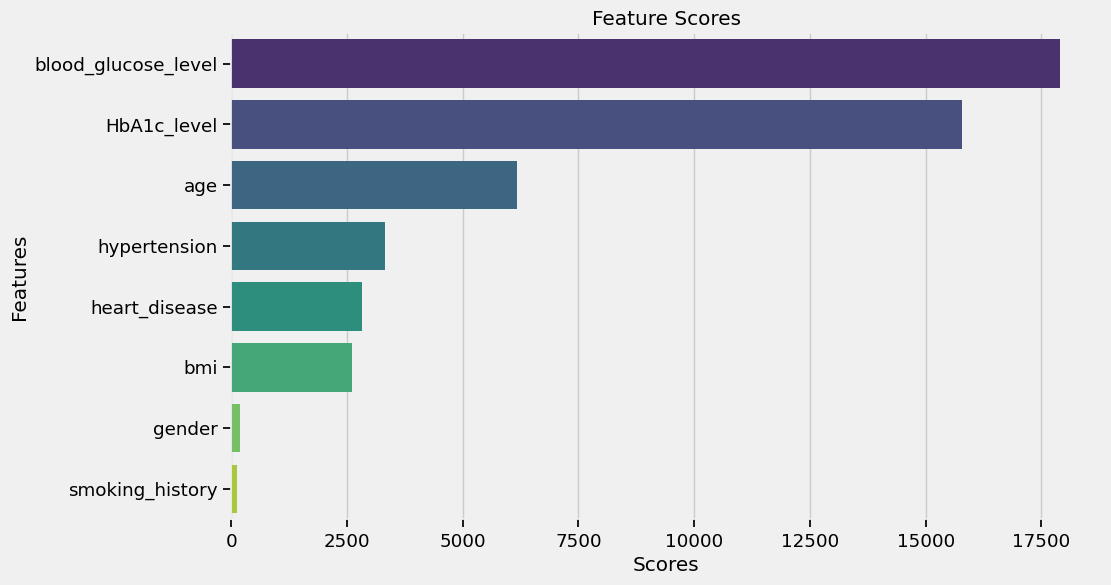

In [27]:
# Feature selection using SelectKBest with ANOVA F-value
X = data.drop(["diabetes"], axis = 1)  
y = data["diabetes"] 
selector = SelectKBest(f_classif, k=8)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]
# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})
# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

In [28]:
# Splitting the data  
X = X.drop(["smoking_history"], axis = 1)  

In [29]:
scale=MinMaxScaler()
scale.fit(X)

MinMaxScaler()

In [30]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.0,80.0,0,1,25.19,6.6,140
1,1.0,54.0,0,0,27.32,6.6,80
2,0.0,28.0,0,0,27.32,5.7,158
3,1.0,36.0,0,0,23.45,5.0,155
4,0.0,76.0,1,1,20.14,4.8,155


In [31]:
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

# KNN Using Grid Search

In [32]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [33]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

In [34]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confution matrix for model " f'{best_model_knn} : \n',cm_knn)
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Confution matrix for model KNeighborsClassifier(metric='chebyshev', n_neighbors=7) : 
 [[25443    67]
 [ 1010  1072]]
Accuracy score for model KNeighborsClassifier(metric='chebyshev', n_neighbors=7) :  0.9609669469411424
classification_report for model KNeighborsClassifier(metric='chebyshev', n_neighbors=7) : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     25510
           1       0.94      0.51      0.67      2082

    accuracy                           0.96     27592
   macro avg       0.95      0.76      0.82     27592
weighted avg       0.96      0.96      0.96     27592



# Random Forest Using Grid Search

In [35]:
clf_rnf=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [36]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

# Best Model for Diabetes

In [37]:
print("Random Forest Best parameters: ", grid_forest.best_params_)

Random Forest Best parameters:  {'max_depth': 5, 'n_estimators': 7}


In [38]:
ac_rnf = accuracy_score(y_test, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf,'\n')
cr_rnf = classification_report(y_test, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Accuracy score for model RandomForestClassifier(max_depth=5, n_estimators=7) :  0.9741229341838213 

classification_report for model RandomForestClassifier(max_depth=5, n_estimators=7) : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     25510
           1       1.00      0.66      0.79      2082

    accuracy                           0.97     27592
   macro avg       0.99      0.83      0.89     27592
weighted avg       0.97      0.97      0.97     27592



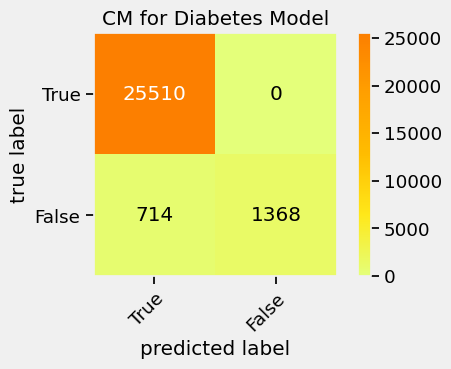

In [39]:
cm_rnf = confusion_matrix(y_test, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='Wistia',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Diabetes Model")
plt.show()

In [40]:
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)

Accuracy score for model KNeighborsClassifier(metric='chebyshev', n_neighbors=7) :  0.9609669469411424
Accuracy score for model RandomForestClassifier(max_depth=5, n_estimators=7) :  0.9741229341838213


In [41]:
print(best_model_rnf.score(X_train,y_train))

0.9756290773532152


In [42]:
print(best_model_rnf.score(X_test,y_test))

0.9741229341838213


In [43]:
#Use Ramdomforest (best accuracy score) for creating a prediction column 
y_pred_final = best_model_rnf.predict(X_test)
X_test['predictions'] = y_pred_final 

In [44]:
X_test

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,predictions
84709,1.0,72.0,0,0,27.32,4.8,80,0
91592,1.0,33.0,0,0,23.17,6.6,126,0
9595,1.0,44.0,0,0,28.68,6.6,145,0
67708,0.0,15.0,0,0,23.92,4.8,100,0
46728,0.0,16.0,0,0,23.30,6.1,158,0
...,...,...,...,...,...,...,...,...
80033,0.0,17.0,0,0,24.78,5.7,80,0
40327,1.0,56.0,0,0,22.76,6.5,126,0
97861,1.0,11.0,0,0,15.26,6.6,140,0
7442,0.0,74.0,1,0,27.32,3.5,126,0


### Test my Model with new dataset

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=66)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 85079), (1, 85079)]


In [50]:
clf_rnf=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_resampled,y_resampled)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [51]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_resampled)

In [52]:
ac_rnf = accuracy_score(y_resampled, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_resampled, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Accuracy score for model RandomForestClassifier(max_depth=6, n_estimators=10) :  0.8967900421960766
classification_report for model RandomForestClassifier(max_depth=6, n_estimators=10) : 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     85079
           1       0.92      0.87      0.89     85079

    accuracy                           0.90    170158
   macro avg       0.90      0.90      0.90    170158
weighted avg       0.90      0.90      0.90    170158



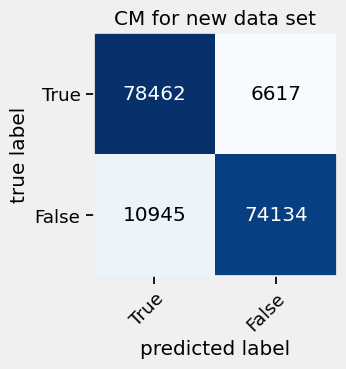

In [53]:
cm_rnf = confusion_matrix(y_resampled, y_pred_rnf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()

# Saving the model

In [54]:
pickle.dump(best_model_rnf, open('Dmodel.pkl' , 'wb'))
model = pickle.load(open('Dmodel.pkl' , 'rb'))